In [1]:
# import libraries for project
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# This will make your plots show in the notebook without having to call plt.show() every time.
%matplotlib inline 

# Q1
<b>Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. 
   Take a look at the first 6 rows.

   Repeat for the internet use dataset. Call this DataFrame internet_df. 
   Take a look at the first six rows.
</b>


In [3]:
gdp_df = pd.read_csv('/Users/landrybutler/github/gdp-and-internet-usage-landrybutler/data/gdp_percapita.csv', nrows=6729)
print(gdp_df.head(6))

internet_df = pd.read_csv('/Users/landrybutler/github/gdp-and-internet-usage-landrybutler/data/internet_use.csv', 
                          nrows=4495)
print(internet_df.head(6))
# internet_df

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2018  1734.723214              NaN
1     Afghanistan  2017  1758.465636              NaN
2     Afghanistan  2016  1757.023490              NaN
3     Afghanistan  2015  1766.593077              NaN
4     Afghanistan  2014  1795.735834              NaN
5     Afghanistan  2013  1807.762344              NaN
  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
5     Afghanistan  2009  3.550000              NaN


# Q2
<b>Look at the shape of each dataframe - how many rows, how many columns.

   Take a look at the data types for the columns in each table.

   Take a look at the last 10 rows of each dataset in turn.
</b>


In [4]:
print(gdp_df.shape)
print(gdp_df.tail(10))
print()
print(internet_df.shape)
print(internet_df.tail(10))


(6729, 4)
     Country or Area  Year        Value  Value Footnotes
6719        Zimbabwe  1999  3054.064189              NaN
6720        Zimbabwe  1998  3099.076182              NaN
6721        Zimbabwe  1997  3036.422224              NaN
6722        Zimbabwe  1996  2985.856605              NaN
6723        Zimbabwe  1995  2736.486436              NaN
6724        Zimbabwe  1994  2768.309953              NaN
6725        Zimbabwe  1993  2572.870395              NaN
6726        Zimbabwe  1992  2591.007534              NaN
6727        Zimbabwe  1991  2906.272849              NaN
6728        Zimbabwe  1990  2819.549467              NaN

(4495, 4)
     Country or Area  Year     Value  Value Footnotes
4485        Zimbabwe  2002  3.994356              NaN
4486        Zimbabwe  2001  0.799846              NaN
4487        Zimbabwe  2000  0.401434              NaN
4488        Zimbabwe  1999  0.161676              NaN
4489        Zimbabwe  1998  0.081648              NaN
4490        Zimbabwe  1997  

<b>results of print(gdp_df.info())</b><br>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731 entries, 0 to 6730
Data columns (total 4 columns):
Country or Area    6731 non-null object
Year               6731 non-null object
Value              6729 non-null float64
Value Footnotes    1 non-null float64
dtypes: float64(2), object(2)
memory usage: 210.5+ KB
None



<p><b>results of print(internet_df.info())</b><br>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
Country or Area    4495 non-null object
Year               4495 non-null int64
Value              4495 non-null float64
Value Footnotes    948 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB
None

# Q3
<b>Drop the 'value footnotes' data from both datasets. Check that this worked as expected.</b>


In [5]:
print(gdp_df.head(6))
gdp_df = gdp_df.drop(columns=['Value Footnotes'], axis=1)
print(gdp_df.head(6))
print()
print(internet_df.head(6))
internet_df = internet_df.drop(columns=['Value Footnotes'], axis=1)
print(internet_df.head(6))



  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2018  1734.723214              NaN
1     Afghanistan  2017  1758.465636              NaN
2     Afghanistan  2016  1757.023490              NaN
3     Afghanistan  2015  1766.593077              NaN
4     Afghanistan  2014  1795.735834              NaN
5     Afghanistan  2013  1807.762344              NaN
  Country or Area  Year        Value
0     Afghanistan  2018  1734.723214
1     Afghanistan  2017  1758.465636
2     Afghanistan  2016  1757.023490
3     Afghanistan  2015  1766.593077
4     Afghanistan  2014  1795.735834
5     Afghanistan  2013  1807.762344

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
5     Afghanistan  2009  3.550000              NaN
  Cou

# Q4
Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.


In [6]:
gdp_df.rename(columns={
    'Country or Area':'Country',
    'Value':'GDP_Per_Capita'
    }, inplace = True)
print(gdp_df.head(6))



       Country  Year  GDP_Per_Capita
0  Afghanistan  2018     1734.723214
1  Afghanistan  2017     1758.465636
2  Afghanistan  2016     1757.023490
3  Afghanistan  2015     1766.593077
4  Afghanistan  2014     1795.735834
5  Afghanistan  2013     1807.762344


# Q5
Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.


In [7]:
internet_df.rename(columns={
    'Country or Area':'Country',
    'Value':'Internet_Users_Pct'
    }, inplace = True)
print(internet_df.head(6))


       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000
5  Afghanistan  2009            3.550000


# Q6
Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.


In [8]:
# gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country','Year'], how='inner')
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country','Year'], how='outer')
gdp_and_internet_use




,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.390000
...,...,...,...,...
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645


# Q7
Look at the first five rows of your new data frame to confirm the columns are how you expect.

# Q8
Look at the last five rows to make sure the data is clean and as expected.


In [9]:
print(gdp_and_internet_use.head())

print(gdp_and_internet_use.tail())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2018     1734.723214                 NaN
1  Afghanistan  2017     1758.465636                 NaN
2  Afghanistan  2016     1757.023490                 NaN
3  Afghanistan  2015     1766.593077                 NaN
4  Afghanistan  2014     1795.735834                6.39
                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
7700  Virgin Islands (U.S.)  1997             NaN            6.948369
7701  Virgin Islands (U.S.)  1996             NaN            4.647186
7702  Virgin Islands (U.S.)  1995             NaN            2.801958
7703  Virgin Islands (U.S.)  1994             NaN            0.940645
7704  Virgin Islands (U.S.)  1990             NaN            0.000000


# Q9
Look at the shape of the new dataset. Were any rows dropped?


In [10]:
print(gdp_and_internet_use.shape)
gdp_and_internet_use.shape

(7705, 4)


(7705, 4)

# Q10
Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.


In [11]:
'''
Create a boolean variable by taking the column of interest and checking if its value equals to the specific value 
that we want to select/keep.

NOTE: This works, but you can only subset for one year at a time. 
is_2004 =  gdp_and_internet_use['Year']==2004
is_2009 =  gdp_and_internet_use['Year']==2009
is_2014 =  gdp_and_internet_use['Year']==2014

# confirm that booleans above can be used to subset list ... all should work in next line
gdp_and_internet_use_test = gdp_and_internet_use[is_2004]
# gdp_and_internet_use_test

'''

# subset by list works better
subset_list = [2004,2009,2014]
gdp_and_internet_use_subset = gdp_and_internet_use[gdp_and_internet_use.Year.isin(subset_list)]

# SUCCESS! The following line prints the subset containing years, 2004, 2009 and 2014
gdp_and_internet_use_subset

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000
...,...,...,...,...
7668,Viet Nam,2009,NaN,26.550000
7673,Viet Nam,2004,NaN,7.642409
7683,Virgin Islands (U.S.),2014,NaN,50.070000
7688,Virgin Islands (U.S.),2009,NaN,27.396510


In [12]:
# Double check the above to be sure it's right. If right, the output will be an empty set.
print(gdp_and_internet_use_subset[~gdp_and_internet_use_subset.Year.isin(subset_list)])

#SUCCESS output is 'Empty DataFrame ...'

Empty DataFrame
Columns: [Country, Year, GDP_Per_Capita, Internet_Users_Pct]
Index: []


# Q11
Create three new data frames, one for 2004, one for 2009, and one for 2014. 
Give them meaningful names that aren't too long.


In [13]:
'''
This is the place to use the earlier subset by boolean method.
'''
is_2004 =  gdp_and_internet_use['Year']==2004
is_2009 =  gdp_and_internet_use['Year']==2009
is_2014 =  gdp_and_internet_use['Year']==2014

# create individual subsets by year using above booleans
gdp_and_internet_use_2004 = gdp_and_internet_use[is_2004]
gdp_and_internet_use_2009 = gdp_and_internet_use[is_2009]
gdp_and_internet_use_2014 = gdp_and_internet_use[is_2014]

# print subsets
print(2004)
print(gdp_and_internet_use_2004)
print()
print(2009)
print(gdp_and_internet_use_2009)
print()
print(2014)
print(gdp_and_internet_use_2014)
print()

2004
                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
14              Afghanistan  2004     1025.208245            0.105809
31                  Albania  2004     7001.054082            2.420388
60                  Algeria  2004    11845.170512            4.634475
89                   Angola  2004     4604.657044            0.464815
118     Antigua and Barbuda  2004    21161.123532           24.266544
...                     ...   ...             ...                 ...
7551              Swaziland  2004             NaN            3.228685
7572                  Syria  2004             NaN            4.321594
7615     T.F.Y.R. Macedonia  2004             NaN           24.440000
7673               Viet Nam  2004             NaN            7.642409
7693  Virgin Islands (U.S.)  2004             NaN           27.377009

[278 rows x 4 columns]

2009
                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
9               Afghanistan  2009     1502.354073      

In [14]:
# Double check the above to be sure they're right. If right, the outputs will be empty sets.
print(gdp_and_internet_use_2004[gdp_and_internet_use_2004.Year!=2004])
print(gdp_and_internet_use_2009[gdp_and_internet_use_2009.Year!=2009])
print(gdp_and_internet_use_2014[gdp_and_internet_use_2014.Year!=2014])
# SUCCESS all are empty

Empty DataFrame
Columns: [Country, Year, GDP_Per_Capita, Internet_Users_Pct]
Index: []
Empty DataFrame
Columns: [Country, Year, GDP_Per_Capita, Internet_Users_Pct]
Index: []
Empty DataFrame
Columns: [Country, Year, GDP_Per_Capita, Internet_Users_Pct]
Index: []


# Q12
Which country had the highest percentage of internet users in 2014? What was the percentage? 
Repeat for 2004 and 2009. (Try typing the first 3 letters of your DataFrame name and hitting the tab 
for auto-complete options).


In [15]:
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['Internet_Users_Pct']==gdp_and_internet_use_2014['Internet_Users_Pct'].max()]

# Iceland is winner with 98.16%

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16


In [16]:
gdp_and_internet_use_2009.loc[gdp_and_internet_use_2009['Internet_Users_Pct']==gdp_and_internet_use_2009['Internet_Users_Pct'].max()]

# Iceland is winner with 93%

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2586,Iceland,2009,41505.084834,93.0


In [17]:
gdp_and_internet_use_2004.loc[gdp_and_internet_use_2004['Internet_Users_Pct']==gdp_and_internet_use_2004['Internet_Users_Pct'].max()]

# Sweden is winner with 83.89%


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5852,Sweden,2004,40177.850408,83.89


# Q13
Which country had the lowest percentage of internet users in 2014? What was the percentage? Repeat for 2004 and 2009.


In [18]:
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['Internet_Users_Pct']==gdp_and_internet_use_2014['Internet_Users_Pct'].min()]

# N. Korea has the lowest use at 0.0%

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.0


In [19]:
gdp_and_internet_use_2009.loc[gdp_and_internet_use_2009['Internet_Users_Pct']==gdp_and_internet_use_2009['Internet_Users_Pct'].min()]

# N. Korea has the lowest use at 0.0%

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6944,Dem. People's Rep. of Korea,2009,NaN,0.0


In [20]:
gdp_and_internet_use_2004.loc[gdp_and_internet_use_2004['Internet_Users_Pct']==gdp_and_internet_use_2004['Internet_Users_Pct'].min()]

# N. Korea has the lowest use at 0.0%

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6949,Dem. People's Rep. of Korea,2004,NaN,0.0


# Q14
Which country had the highest gdp per capita in 2014? What was the gdp per capita?


In [21]:
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_Per_Capita']==gdp_and_internet_use_2014['GDP_Per_Capita'].max()]

# Macao SAR, China with GDP_Per_Capita of 130,439

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN


# Q15
Which country had the highest gdp per capita in 2009? What was the gdp per capita?


In [22]:
gdp_and_internet_use_2009.loc[gdp_and_internet_use_2009['GDP_Per_Capita']==gdp_and_internet_use_2009['GDP_Per_Capita'].max()]

# Qatar with GDP_Per_Capita of 112,525

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5008,Qatar,2009,112525.718267,53.1


# Q16
Which country had the highest gdp per capita in 2004? What was the gdp per capita?


In [23]:
gdp_and_internet_use_2004.loc[gdp_and_internet_use_2004['GDP_Per_Capita']==gdp_and_internet_use_2004['GDP_Per_Capita'].max()]

# Qatar with GDP_Per_Capita of 117,271

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5013,Qatar,2004,117271.427067,20.701648


# Q17
Which country had the lowest gdp per capita in 2014? What was the gdp per capita?


In [24]:
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_Per_Capita']==gdp_and_internet_use_2014['GDP_Per_Capita'].min()]

# Central African Republic with GDP_Per_Capita of 672.681

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN


# Q18
Create some scatterplots:<br>
a. 2004 Percent Using the Internet vs GDP Per Capita<br>
b. 2009 Percent Using the Internet vs GDP Per Capita<br>
c. 2014 Percent Using the Internet vs GDP Per Capita

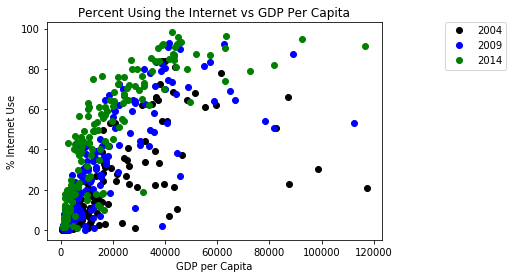

In [137]:
plt.plot(gdp_and_internet_use_2004['GDP_Per_Capita'], gdp_and_internet_use_2004['Internet_Users_Pct'], 
         'o', color='black', label=2004);
plt.plot(gdp_and_internet_use_2009['GDP_Per_Capita'], gdp_and_internet_use_2009['Internet_Users_Pct'], 
         'o', color='blue', label=2009);
plt.plot(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct'], 
         'o', color='green', label=2014);


# Add labels and legend
plt.xlabel('GDP per Capita')
plt.ylabel('% Internet Use')
plt.title('Percent Using the Internet vs GDP Per Capita')
plt.legend(bbox_to_anchor=(1.2,0.9),
           bbox_transform=plt.gcf().transFigure)

Text(0.5, 1.0, 'Percent Using the Internet vs GDP Per Capita in 2004')

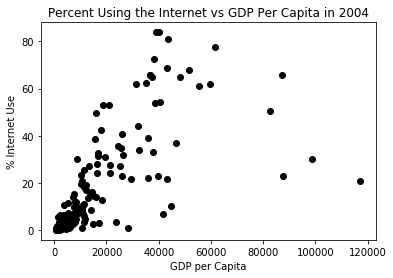

In [139]:
plt.plot(gdp_and_internet_use_2004['GDP_Per_Capita'], gdp_and_internet_use_2004['Internet_Users_Pct'], 'o', color='black');
# Add labels 
plt.xlabel('GDP per Capita')
plt.ylabel('% Internet Use')
plt.title('Percent Using the Internet vs GDP Per Capita in 2004')


Text(0.5, 1.0, 'Percent Using the Internet vs GDP Per Capita in 2009')

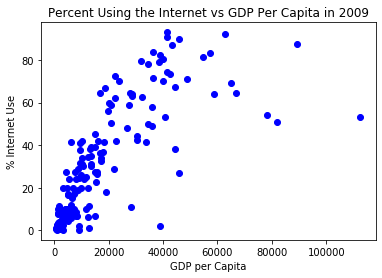

In [140]:
plt.plot(gdp_and_internet_use_2009['GDP_Per_Capita'], gdp_and_internet_use_2009['Internet_Users_Pct'], 'o', color='blue');
# Add labels 
plt.xlabel('GDP per Capita')
plt.ylabel('% Internet Use')
plt.title('Percent Using the Internet vs GDP Per Capita in 2009')


Text(0.5, 1.0, 'Percent Using the Internet vs GDP Per Capita in 2014')

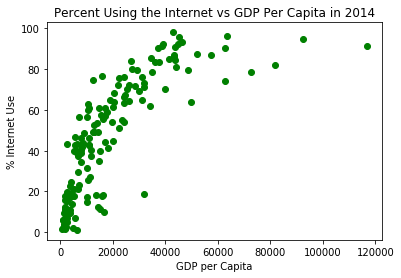

In [141]:
plt.plot(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct'], 
         'o', color='green');
# Add labels 
plt.xlabel('GDP per Capita')
plt.ylabel('% Internet Use')
plt.title('Percent Using the Internet vs GDP Per Capita in 2014')


# Observations

In 2009 and 2004, even some of the rich companies had low levels of Internet usage. This has changed over time. By 2014, the plot shows most growth toward the bottom end of GDP_Per_Capita, the poorer countries. By this year, rich countries have most of their citizens online and the poorer countries are getting their citizens online as well, though without the help of a larger GDP.



# Q19
<b>Look at the distribution of gdp per capita values for 2014. Is it unimodal?</b><br>
No, this distribution is multimodal, nonsymmetric and skewed right

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a202ca9d0>]],
      dtype=object)

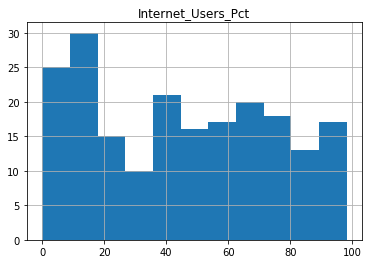

In [162]:
gdp_and_internet_use_2014.hist('Internet_Users_Pct', bins=11)

In [167]:
# sns.distplot(gdp_and_internet_use_2014['Internet_Users_Pct'].dropna)

# Q20
<b>What are the top 5 countries in terms of internet use in 2014?</b><br>
  Internet_Users_Pct is the key variable here

<p><b>Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. </b><br>
You should have 15 rows. Check that this is true.


In [29]:
# Create dataframes for each Top 5
top5_gdp_and_internet_use_2004 = gdp_and_internet_use_2004.nlargest(5,'Internet_Users_Pct')
top5_gdp_and_internet_use_2009 = gdp_and_internet_use_2009.nlargest(5,'Internet_Users_Pct')
top5_gdp_and_internet_use_2014 = gdp_and_internet_use_2014.nlargest(5,'Internet_Users_Pct')

# concatenate Top 5 dataframes
top5_internet = pd.concat([top5_gdp_and_internet_use_2004,top5_gdp_and_internet_use_2009, top5_gdp_and_internet_use_2014])
top5_internet




,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5852,Sweden,2004,40177.850408,83.89
2591,Iceland,2004,38893.378798,83.88
1414,Denmark,2004,43670.446201,80.93
4540,Norway,2004,61612.275634,77.69
7247,Korea (Rep. of),2004,NaN,72.70
2586,Iceland,2009,41505.084834,93.00
4535,Norway,2009,62617.153609,92.08
5847,Sweden,2009,41327.626252,91.00
4332,Netherlands,2009,45724.862764,89.63
3615,Luxembourg,2009,89098.734264,87.31


# Q21
Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

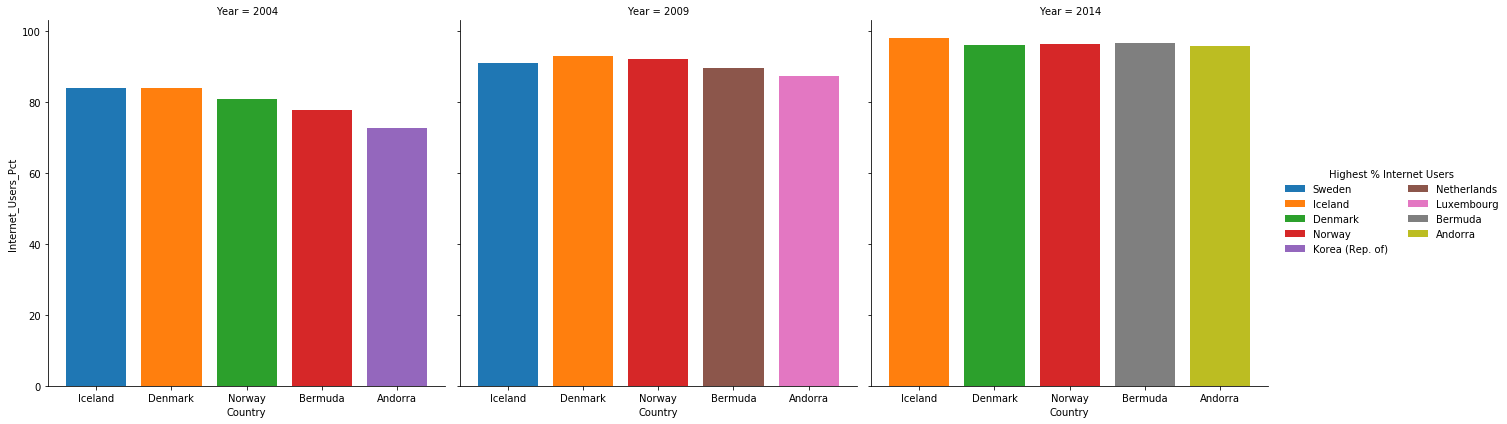

In [73]:
import seaborn as sns

top5_internet

usage_over_time = sns.FacetGrid(top5_internet, col='Year', hue='Country', col_wrap=3, height=6)
usage_over_time.map(plt.bar, 'Country','Internet_Users_Pct')
usage_over_time.add_legend(ncol=2, title='Highest % Internet Users');

# DEBUGDEBUG: This section returns the wrong info as it's not been limited to the 10-year period
# AND the plots below, show the wrong percentages for Andorra's internet usage. 
# Checking the db for just Andorra gives different results. 

# Q22
<b>Which country had the greatest growth between 2004 and 2014? </b><br>
Andorra had the greatest growth between 2004 and 2014: from 26.84% in 2004 to 95.9% in 2014.

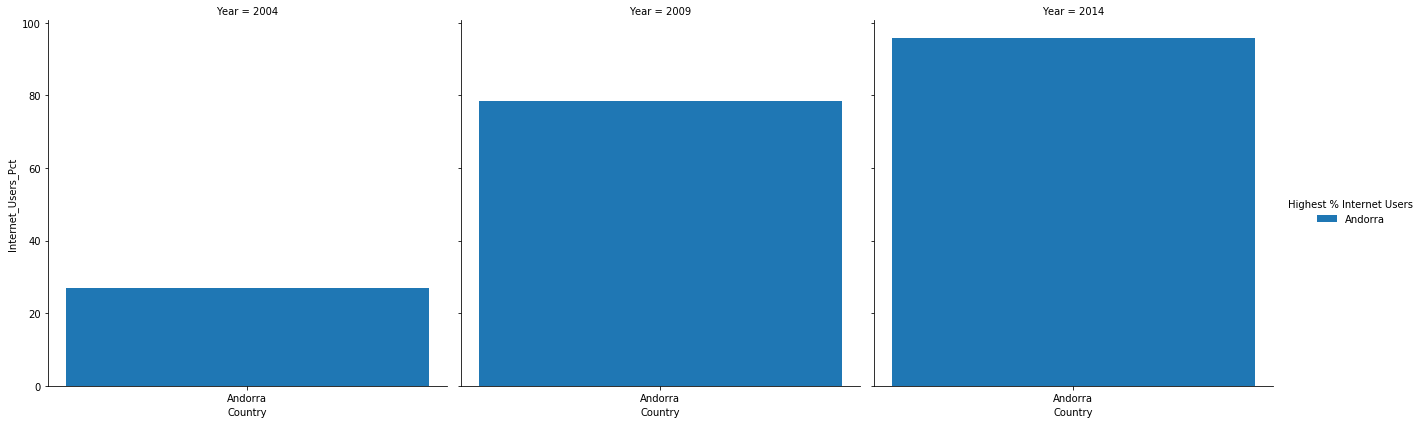

In [42]:
# NOTE: This code shows that Andorra's percentage was 26.84 in 2004 and 95.9 in 2014. 
find_andorra2004 = gdp_and_internet_use_2004.loc[gdp_and_internet_use_2004['Country']=='Andorra']
find_andorra2009 = gdp_and_internet_use_2009.loc[gdp_and_internet_use_2009['Country']=='Andorra']
find_andorra2014 = gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['Country']=='Andorra']
find_andorra = pd.concat([find_andorra2004,find_andorra2009,find_andorra2014])

# plot the stats so easier to read
usage_over_time2 = sns.FacetGrid(find_andorra, col='Year', hue='Country', col_wrap=3, height=6)
usage_over_time2.map(plt.bar, 'Country','Internet_Users_Pct')
usage_over_time2.add_legend(ncol=2, title='Highest % Internet Users');

#find_andorra

In [68]:
'''
   NOTE: this block of code puts the names of the top5 countries (for 2014)* into a list that can be used as a filter 
   for the entire data set. This allows us to generate 10-year trends for the top5.
   
   * 2014 is not specified, but the top 5 of 2014 have higher percentages than previous years so included by default.
   A better(?) way to do this might be to specify 2014 IF using that year is more important than getting the top5 
   countries over the 10-yer period. 

'''

the_real_top5 = top5_internet.nlargest(5,'Internet_Users_Pct') 
print(the_real_top5)

ten_year_trends_names = the_real_top5['Country'].values.tolist() 
print(ten_year_trends_names)

ten_year_trends_period = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

#Now convert list to a set 
#ten_year_trends_set = set(ten_year_trends_list) 
#print(ten_year_trends_set)

#Use the set as filter on gdp_and_internet_use
ten_year_trends_subset = gdp_and_internet_use[gdp_and_internet_use.Country.isin(ten_year_trends_names)&
                                             (gdp_and_internet_use.Year.isin(ten_year_trends_period))] 
ten_year_trends_subset

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2581  Iceland  2014    42774.888849               98.16
6772  Bermuda  2014             NaN               96.80
4530   Norway  2014    63328.259526               96.30
1404  Denmark  2014    45057.083449               95.99
6732  Andorra  2014             NaN               95.90
['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
538,Bermuda,2013,50669.314770,95.300000
539,Bermuda,2012,52137.300373,91.299305
540,Bermuda,2011,54984.510395,88.336000
541,Bermuda,2010,56395.007800,84.210000
542,Bermuda,2009,57151.919132,83.250000
543,Bermuda,2008,60675.982086,82.300000
544,Bermuda,2007,60117.459910,74.350594
545,Bermuda,2006,58784.593291,69.899655
546,Bermuda,2005,56017.191620,65.447066
547,Bermuda,2004,55452.638880,60.990867


Text(0.5, 1.0, 'Top 5 Using the Internet vs GDP Per Capita: 2004-14')

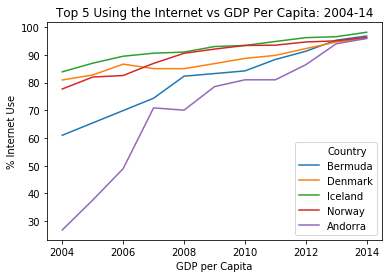

In [144]:
# plot the stats so easier to read
usage_over_10years = sns.lineplot(x='Year', y='Internet_Users_Pct', hue='Country', data=ten_year_trends_subset,
                                 )
usage_over_10years
# Add labels 
plt.xlabel('GDP per Capita')
plt.ylabel('% Internet Use')
plt.title('Top 5 Using the Internet vs GDP Per Capita: 2004-14')


In [70]:
# NOTE: just put this here for reference
ten_year_trends_subset


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
538,Bermuda,2013,50669.314770,95.300000
539,Bermuda,2012,52137.300373,91.299305
540,Bermuda,2011,54984.510395,88.336000
541,Bermuda,2010,56395.007800,84.210000
542,Bermuda,2009,57151.919132,83.250000
543,Bermuda,2008,60675.982086,82.300000
544,Bermuda,2007,60117.459910,74.350594
545,Bermuda,2006,58784.593291,69.899655
546,Bermuda,2005,56017.191620,65.447066
547,Bermuda,2004,55452.638880,60.990867


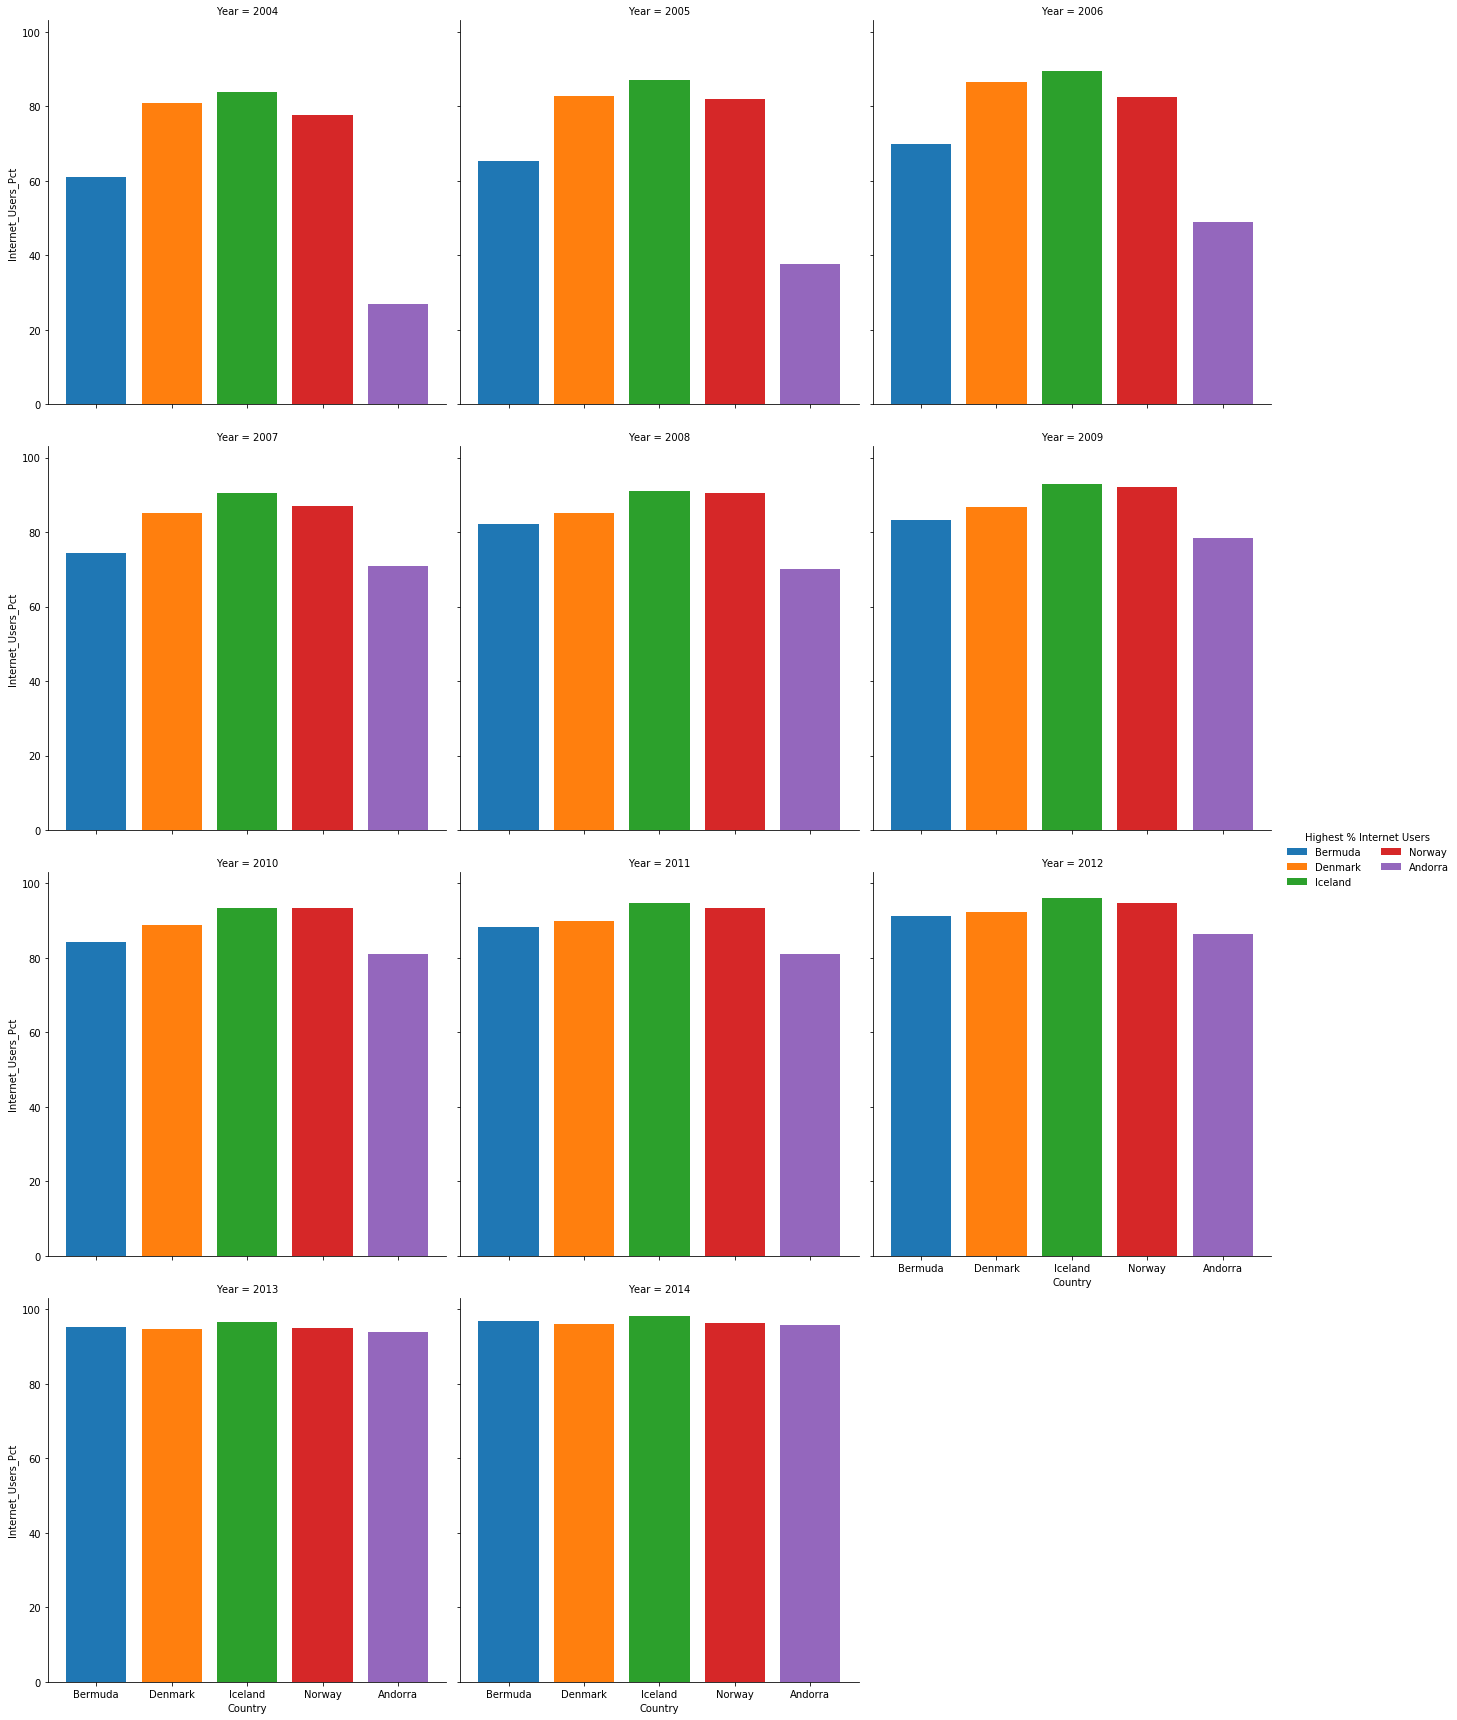

In [169]:
# Note: This is a corrected version of the previos FacetGrid, now sorted properly and including all years, 2004-14
usage_over_time_corrected = sns.FacetGrid(ten_year_trends_subset, col='Year', hue='Country', col_wrap=3, height=6)
usage_over_time_corrected.map(plt.bar, 'Country','Internet_Users_Pct')
usage_over_time_corrected.add_legend(ncol=2, title='Highest % Internet Users');


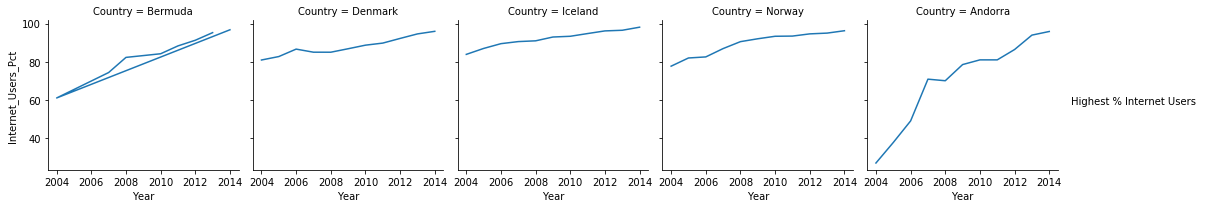

In [171]:
# Note: This is a line version FacetGrid, now sorted properly 
usage_over_time_corrected = sns.FacetGrid(ten_year_trends_subset, col='Country')
usage_over_time_corrected.map(plt.plot, 'Year','Internet_Users_Pct')
usage_over_time_corrected.add_legend(ncol=2, title='Highest % Internet Users');


# Bermuda

In [65]:
# Is there a plotting issue with Bermuda? Can you fix it?

# Get Bermuda stats
gdp_and_internet_use_bermuda = gdp_and_internet_use[gdp_and_internet_use['Country']=='Bermuda']

gdp_and_internet_use_bermuda

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
538,Bermuda,2013,50669.314770,95.300000
539,Bermuda,2012,52137.300373,91.299305
540,Bermuda,2011,54984.510395,88.336000
541,Bermuda,2010,56395.007800,84.210000
542,Bermuda,2009,57151.919132,83.250000
543,Bermuda,2008,60675.982086,82.300000
544,Bermuda,2007,60117.459910,74.350594
545,Bermuda,2006,58784.593291,69.899655
546,Bermuda,2005,56017.191620,65.447066
547,Bermuda,2004,55452.638880,60.990867


The database does not have 2014 Internet stats for Bermuda. Using an INNER JOIN earlier in the code filters the country out. Changing to an OUTER JOIN includes Bermuda, N. Korea and other contries that had been excluded from INNER JOIN. I've changed the code and answers to work with OUTER JOINed data.

In [75]:
# DEBUGDEBUG: this sction is deprecated. Skip unless needed for reference.
# Bermuda's Internet use stats
#plt.plot(gdp_and_internet_use_bermuda['Year'], gdp_and_internet_use_bermuda['Internet_Users_Pct']);

# DEBUGDEBUG: What's wrong with this plot? The diagonal line is coming from??? not sure

<b>Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage.<br>Which country has consistently had the least internet use?</b>

In [80]:
# Create dataframes for each Bottom 5
bottom5_gdp_and_internet_use_2004 = gdp_and_internet_use_2004.nsmallest(5,'Internet_Users_Pct')
bottom5_gdp_and_internet_use_2009 = gdp_and_internet_use_2009.nsmallest(5,'Internet_Users_Pct')
bottom5_gdp_and_internet_use_2014 = gdp_and_internet_use_2014.nsmallest(5,'Internet_Users_Pct')

# concatenate Bottom 5 dataframes
bottom5_internet = pd.concat([bottom5_gdp_and_internet_use_2004,bottom5_gdp_and_internet_use_2009, bottom5_gdp_and_internet_use_2014])
bottom5_internet

the_real_bottom5 = bottom5_gdp_and_internet_use_2014.nlargest(5,'Internet_Users_Pct') 
print(the_real_bottom5)

ten_year_trends_bottom5_names = the_real_bottom5['Country'].values.tolist() 
print(ten_year_trends_bottom5_names)


                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7521                      Somalia  2014             NaN                1.63
794                       Burundi  2014      768.469837                1.38
6044                  Timor-Leste  2014     6466.737732                1.14
6999                      Eritrea  2014             NaN                0.99
6940  Dem. People's Rep. of Korea  2014             NaN                0.00
['Somalia', 'Burundi', 'Timor-Leste', 'Eritrea', "Dem. People's Rep. of Korea"]


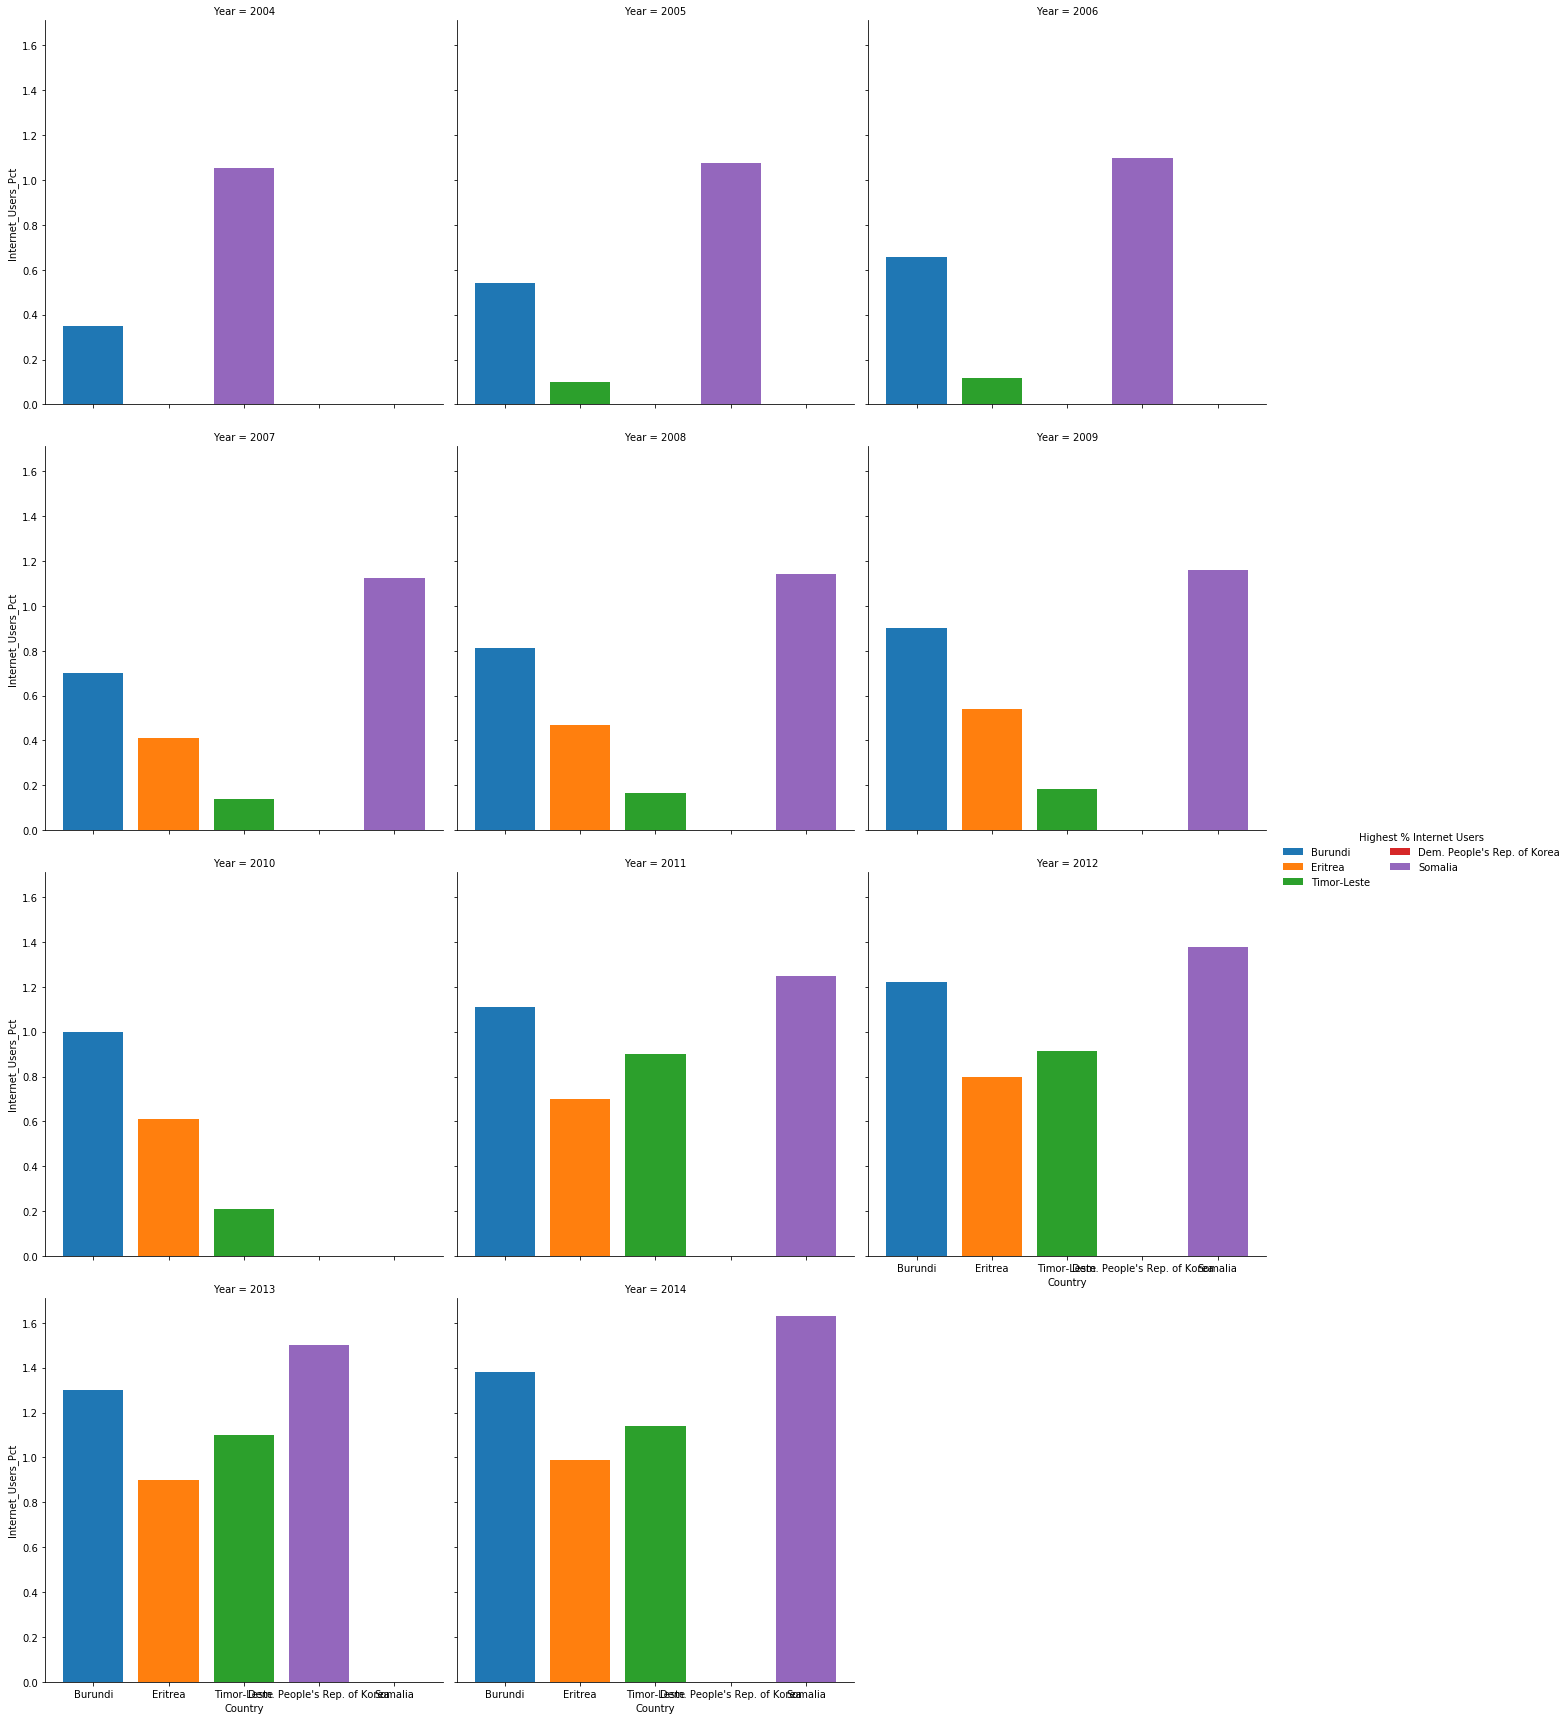

In [83]:
'''usage_over_time2 = sns.FacetGrid(bottom5_internet, col='Year', hue='Country', col_wrap=3, height=6)
usage_over_time2.map(plt.bar, 'Country','Internet_Users_Pct')
usage_over_time2.add_legend(ncol=2, title='Lowest % Internet Users');
'''
#Set filter on gdp_and_internet_use
ten_year_trends_lowest = gdp_and_internet_use[gdp_and_internet_use.Country.isin(ten_year_trends_bottom5_names)&
                                             (gdp_and_internet_use.Year.isin(ten_year_trends_period))] 

usage_over_time_lowest = sns.FacetGrid(ten_year_trends_lowest, col='Year', hue='Country', col_wrap=3, height=6)
usage_over_time_lowest.map(plt.bar, 'Country','Internet_Users_Pct')
usage_over_time_lowest.add_legend(ncol=2, title='Highest % Internet Users');


In [ ]:
# Note: This is a line version FacetGrid, now sorted properly 
usage_over_time_corrected = sns.FacetGrid(ten_year_trends_lowest, col='Country')
usage_over_time_corrected.map(plt.plot, 'Year','Internet_Users_Pct')
usage_over_time_corrected.add_legend(ncol=2, title='Lowest % Internet Users');


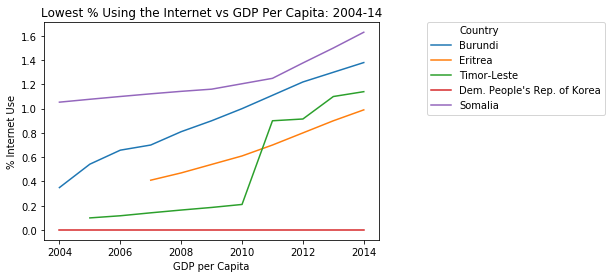

In [147]:
# plot the stats on one chart so easier to read
usage_over_10years2 = sns.lineplot(x='Year', y='Internet_Users_Pct', hue='Country', data=ten_year_trends_lowest,
                                 )
usage_over_10years2
# Add labels 
plt.xlabel('GDP per Capita')
plt.ylabel('% Internet Use')
plt.title('Lowest % Using the Internet vs GDP Per Capita: 2004-14')
plt.legend(bbox_to_anchor=(1,0.9),
           bbox_transform=plt.gcf().transFigure)

North Korean consistently has the lowest level of Internet usage.

# NOTE: The code in this box was useful and I learned something but ultimately did not use it to solve this question


<b>I need to get the names of the Top 5 countries dataframe into a list <br>
NOTE: This returns more than 5 countries because the top 5 are not the same 5 each year to fix, get the top 5 percentages from the top 5 list</b>
the_real_top5 = top5_internet.nlargest(5,'Internet_Users_Pct')
print(the_real_top5)

ten_year_trends_list = the_real_top5['Country'].values.tolist()
print(ten_year_trends_list)

<b>Now convert list to a set</b>
ten_year_trends_set = set(ten_year_trends_list)
print(ten_year_trends_set)

<b>Use the set as filter on gdp_and_internet_use</b>
ten_year_trends_subset = gdp_and_internet_use[gdp_and_internet_use.Country.isin(ten_year_trends_list)]
ten_year_trends_subset.shape

# END of NOTE



<b>Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.</b>

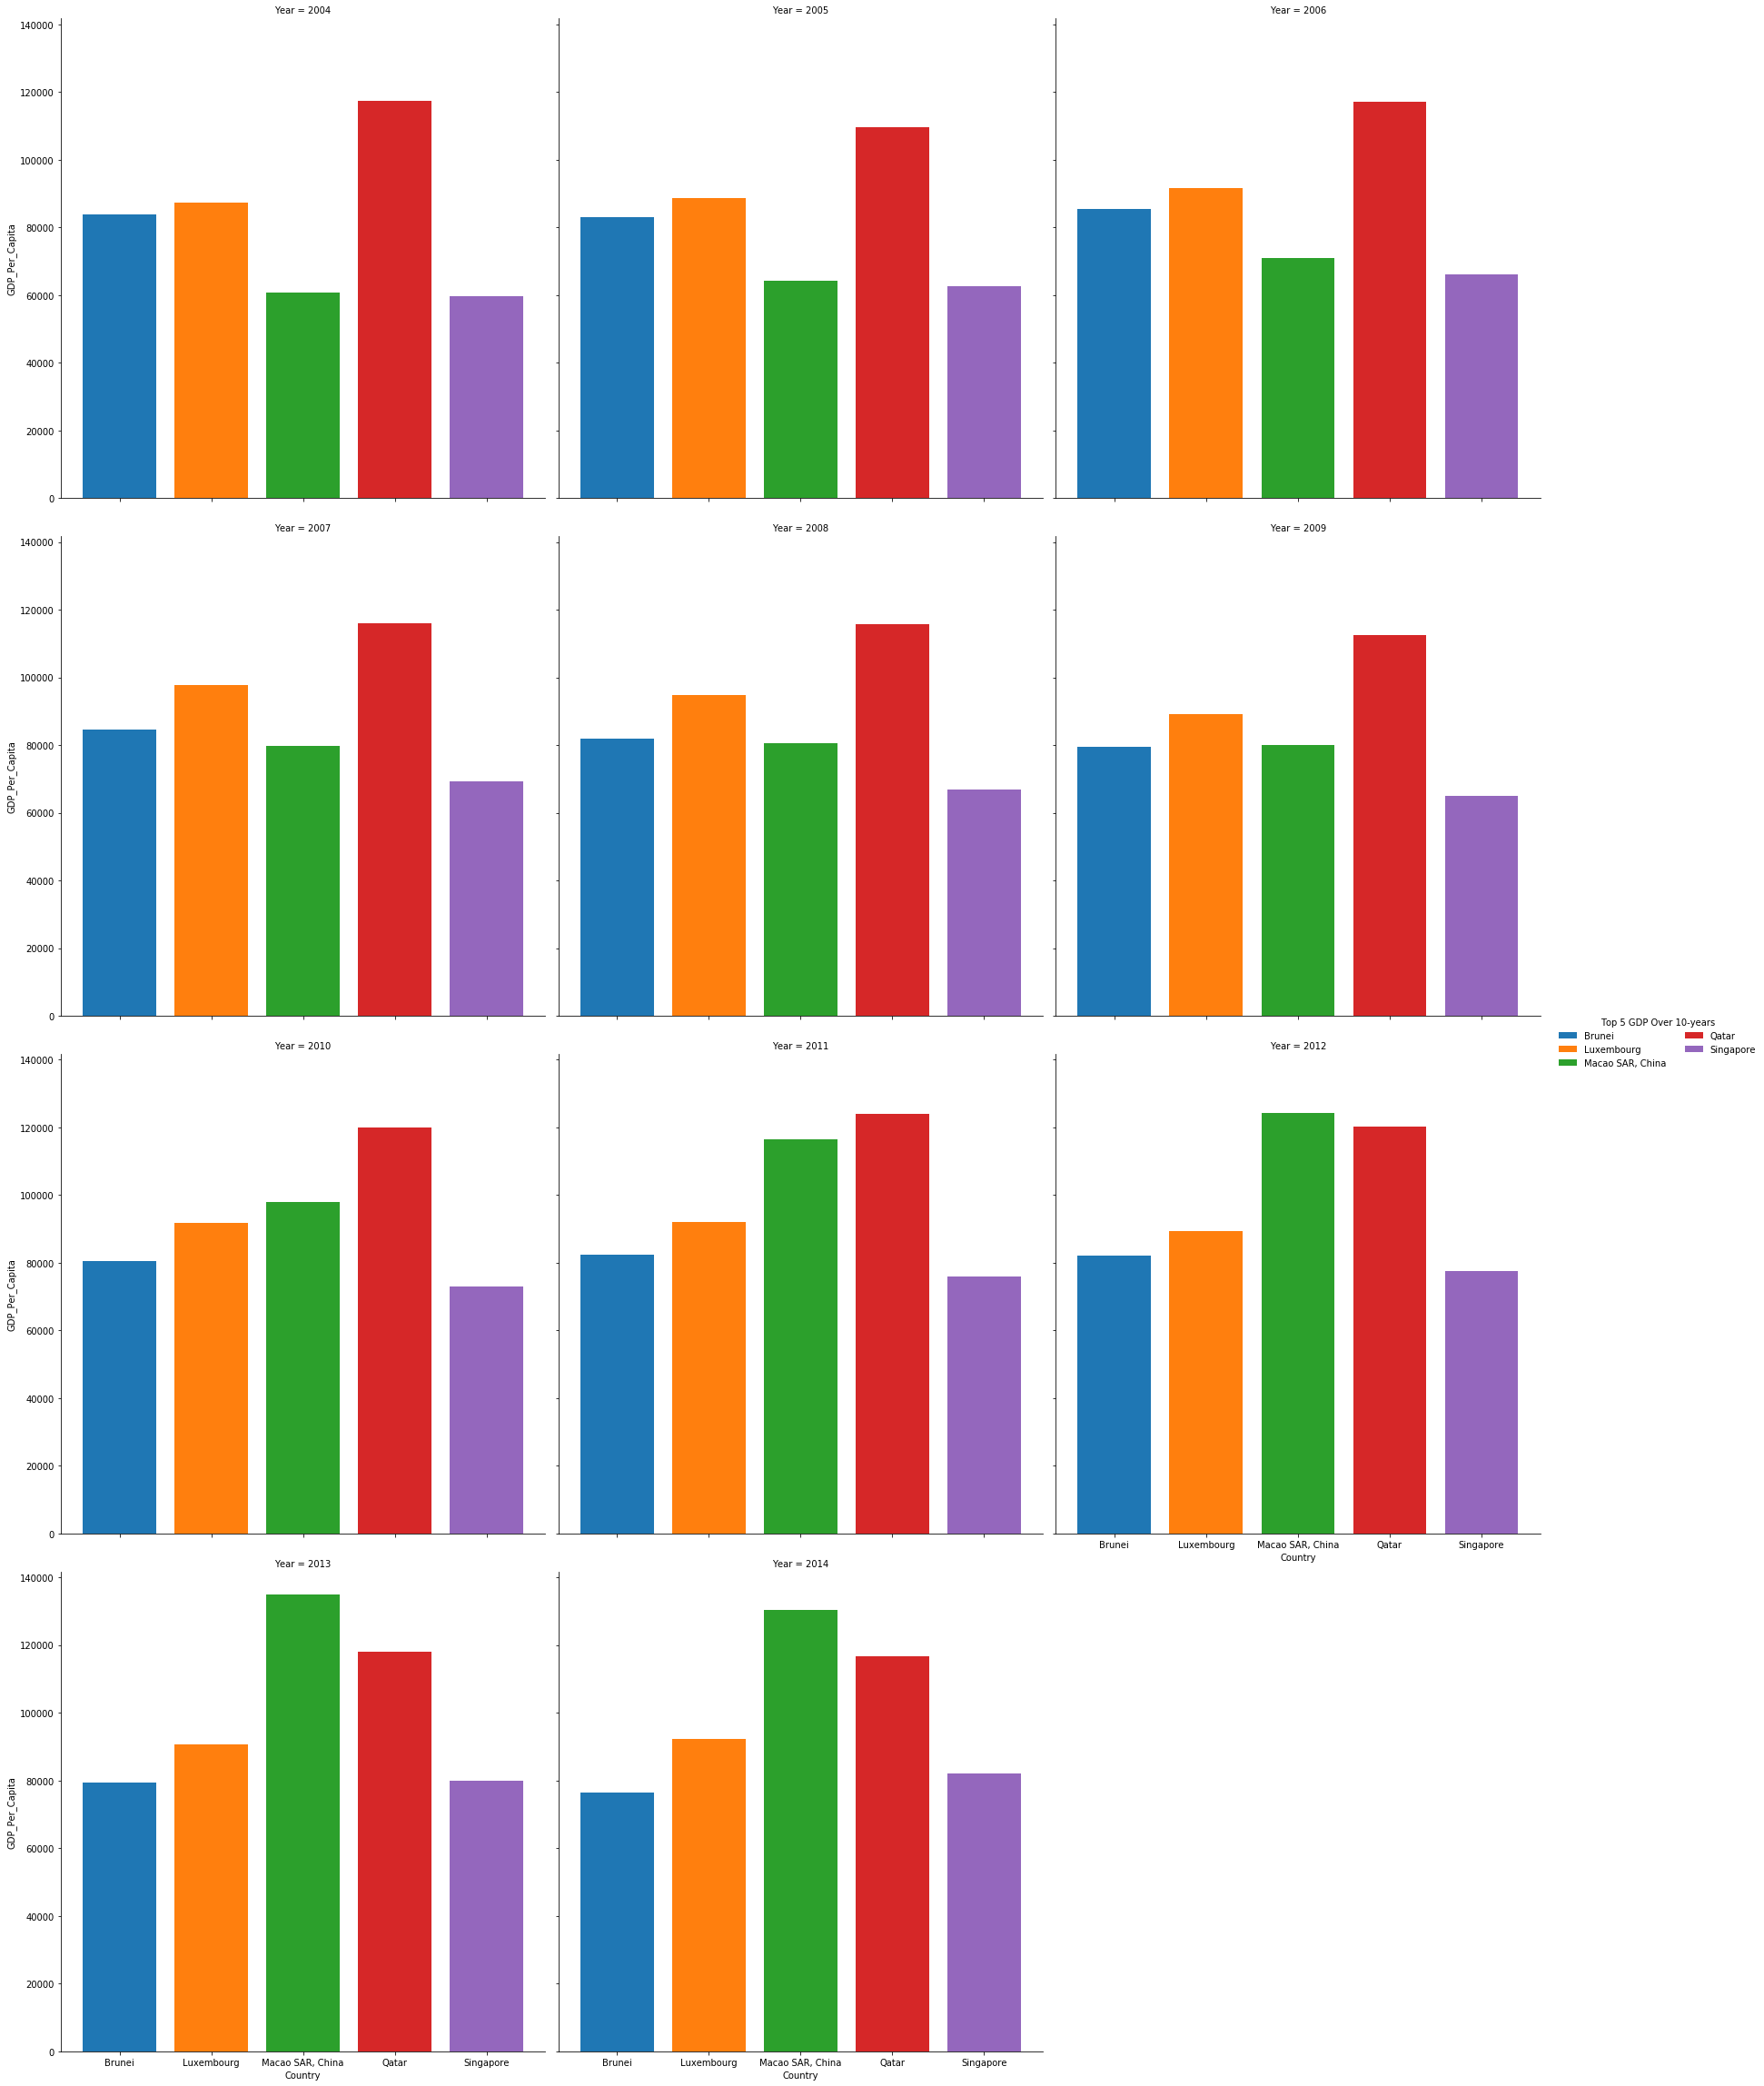

In [94]:

# 10-year trends in gdp per capita for top 5 countries
# get top 5 countries
top5_gdp_2014 = gdp_and_internet_use_2014.nlargest(5,'GDP_Per_Capita')
top5_gdp_2014

# put names of top5 into list
top5_gdp_2014_names = top5_gdp_2014['Country'].values.tolist() 
top5_gdp_2014_names


ten_year_gdp = gdp_and_internet_use[gdp_and_internet_use.Country.isin(top5_gdp_2014_names)&
                                             (gdp_and_internet_use.Year.isin(ten_year_trends_period))] 

ten_year_gdp


ten_year_gdp_plot = sns.FacetGrid(ten_year_gdp, col='Year', hue='Country', col_wrap=3, height=8)
ten_year_gdp_plot.map(plt.bar, 'Country','GDP_Per_Capita')
ten_year_gdp_plot.add_legend(ncol=2, title='Top 5 GDP Over 10-years');


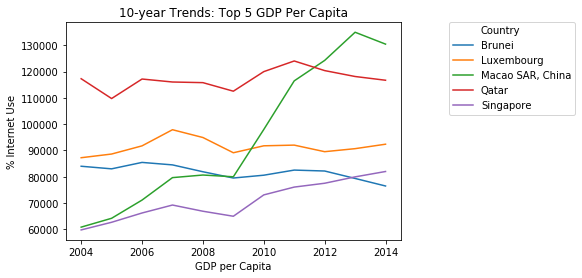

In [149]:
# plot the stats on one chart so easier to read
gdp_over_10years = sns.lineplot(x='Year', y='GDP_Per_Capita', hue='Country', data=ten_year_gdp,
                                 )
gdp_over_10years
# Add labels 
plt.xlabel('GDP per Capita')
plt.ylabel('% Internet Use')
plt.title('10-year Trends: Top 5 GDP Per Capita')
plt.legend(bbox_to_anchor=(1,0.9),
           bbox_transform=plt.gcf().transFigure)

<b>Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.</b>

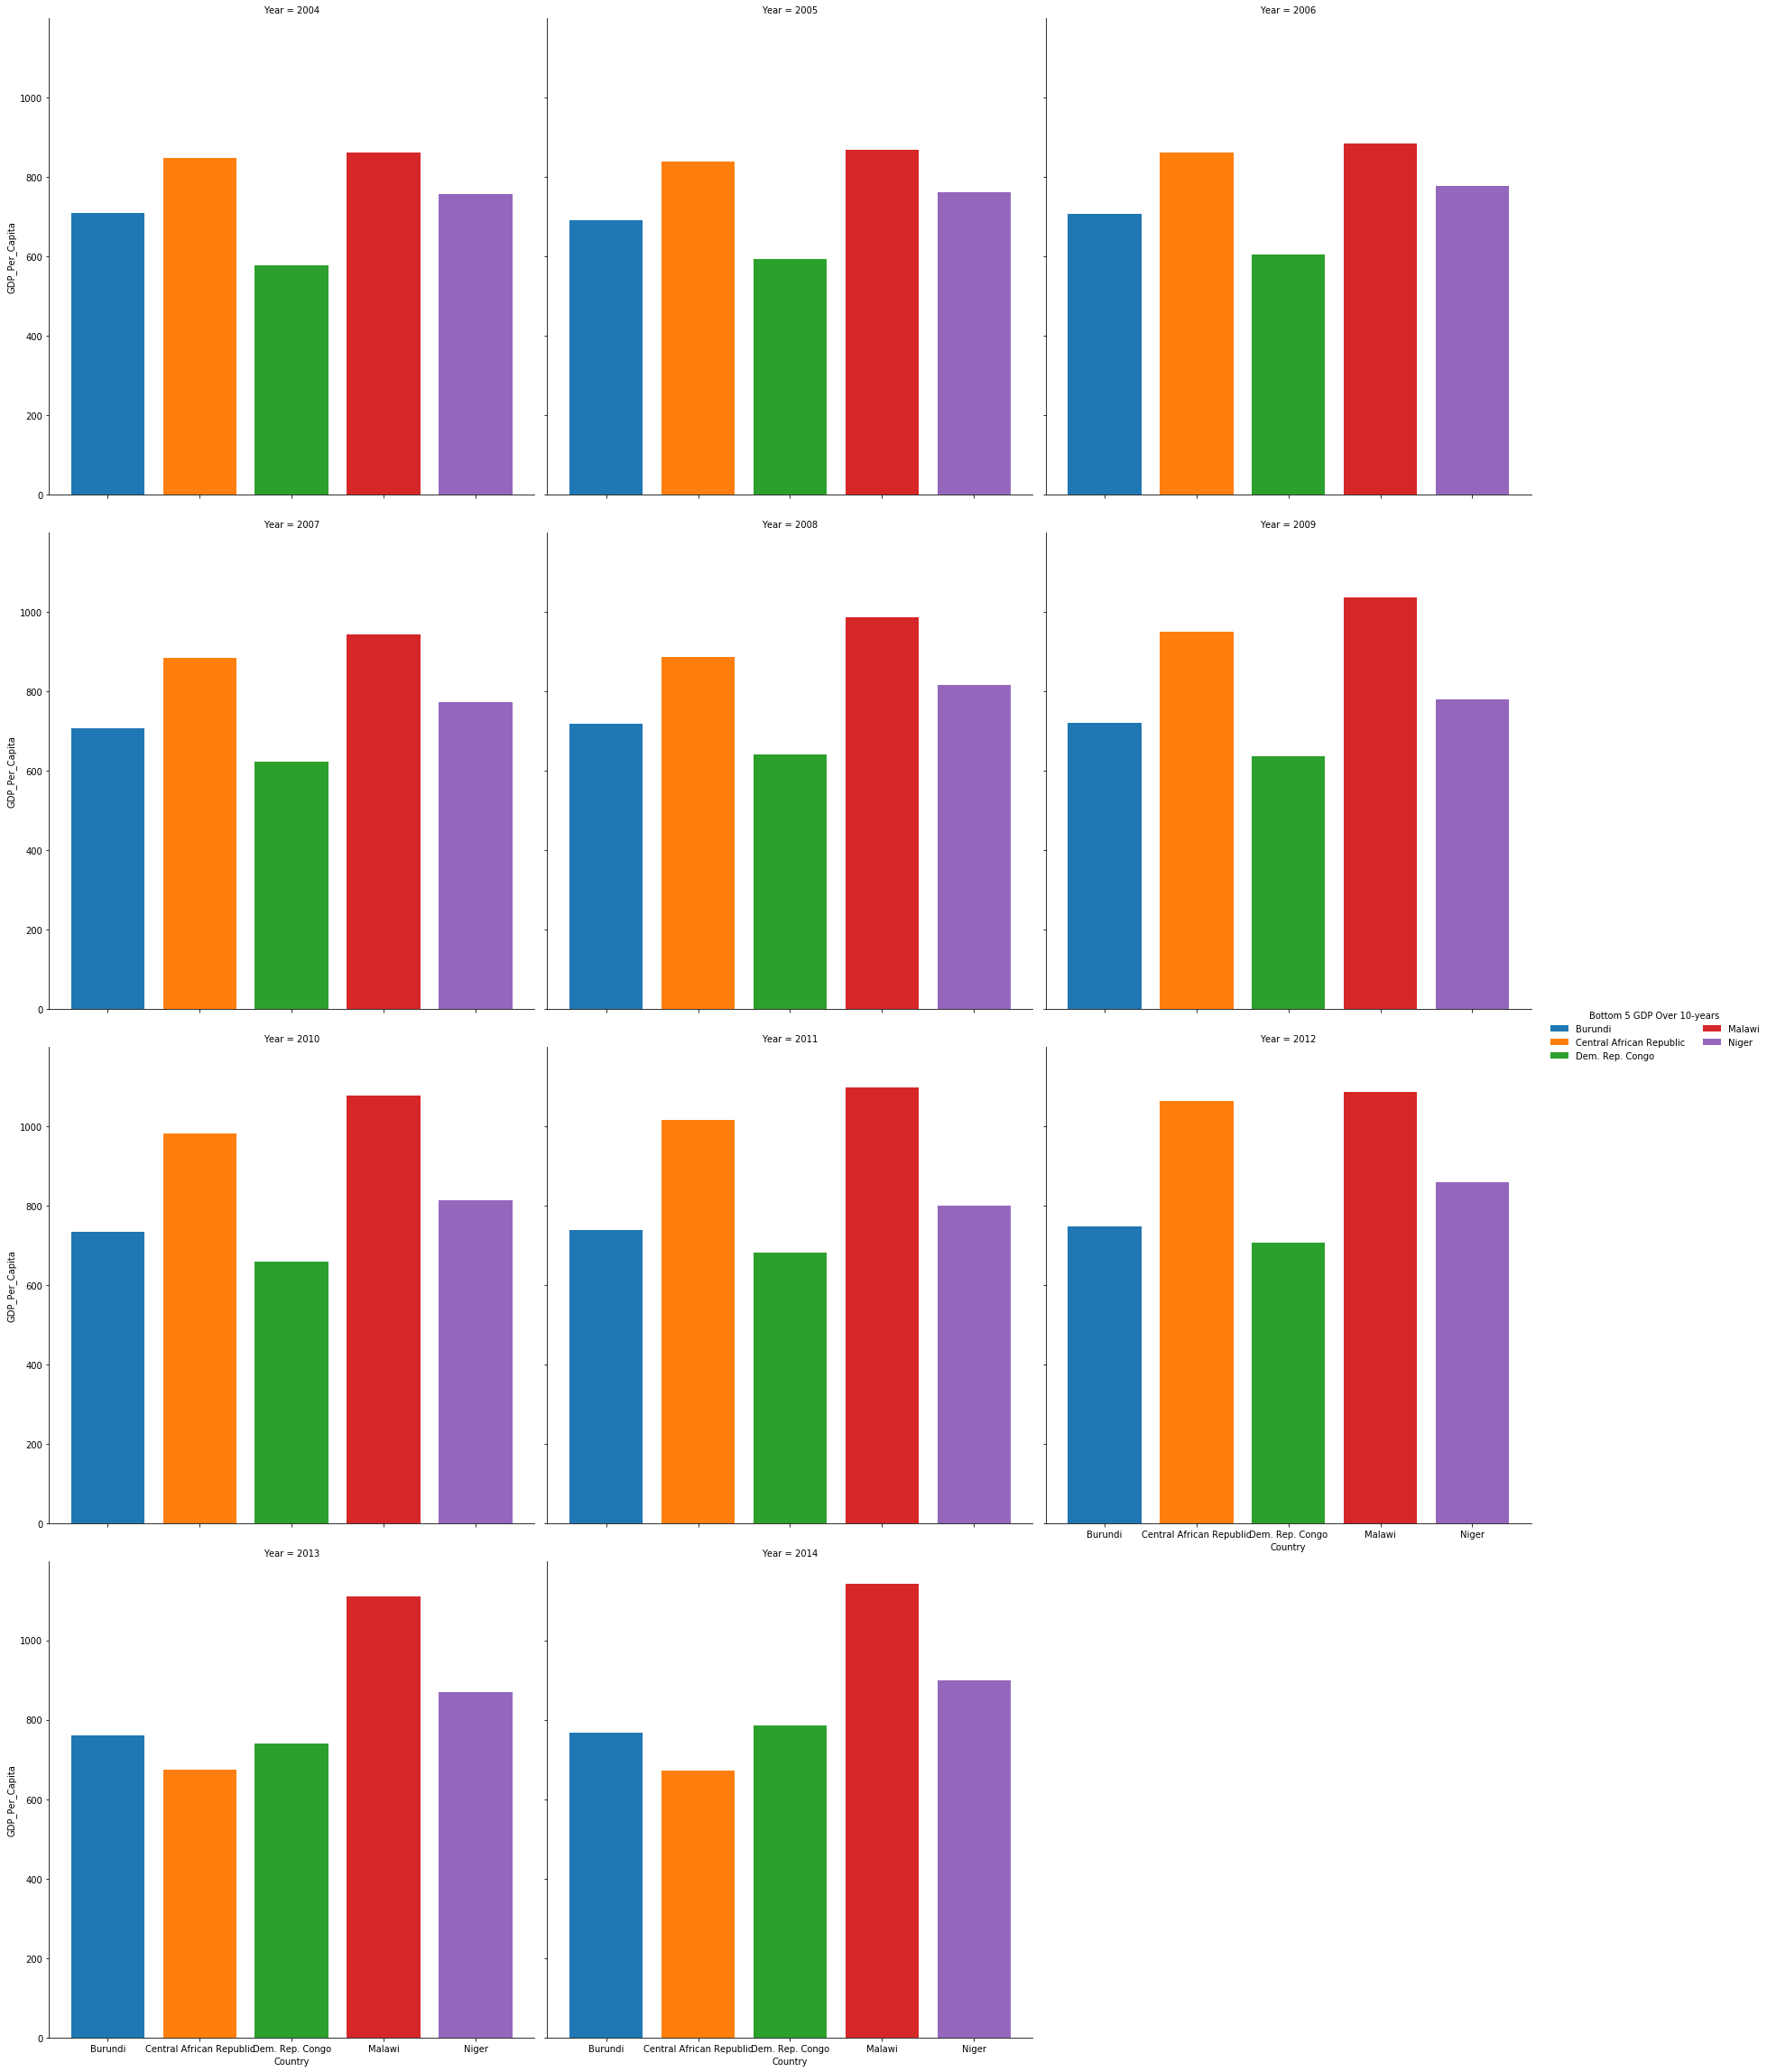

In [100]:
# 10-year trends in gdp per capita for bottom 5 countries
# get bottom 5 countries
bottom5_gdp_2014 = gdp_and_internet_use_2014.nsmallest(5,'GDP_Per_Capita')
bottom5_gdp_2014

# put names of top5 into list
bottom5_gdp_2014_names = bottom5_gdp_2014['Country'].values.tolist() 
bottom5_gdp_2014_names


ten_year_lowest_gdp = gdp_and_internet_use[gdp_and_internet_use.Country.isin(bottom5_gdp_2014_names)&
                                             (gdp_and_internet_use.Year.isin(ten_year_trends_period))] 

ten_year_lowest_gdp

ten_year_gdp_plot = sns.FacetGrid(ten_year_lowest_gdp, col='Year', hue='Country', col_wrap=3, height=8)
ten_year_gdp_plot.map(plt.bar, 'Country','GDP_Per_Capita')
ten_year_gdp_plot.add_legend(ncol=2, title='Top 5 GDP Over 10-years');



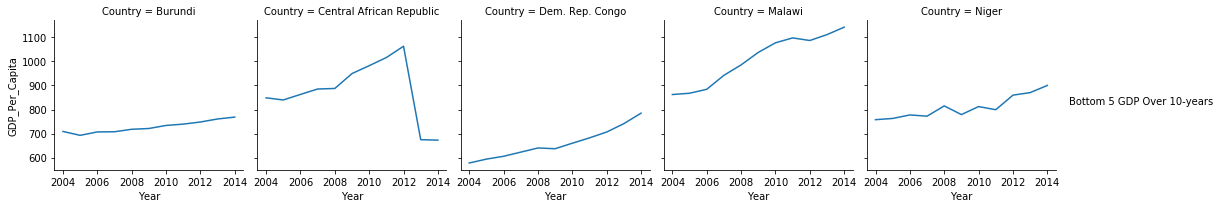

In [173]:
usage_over_time_lowest = sns.FacetGrid(ten_year_lowest_gdp, col='Country')
usage_over_time_lowest.map(plt.plot, 'Year','GDP_Per_Capita')
usage_over_time_lowest.add_legend(ncol=2, title='Bottom 5 GDP Over 10-years');



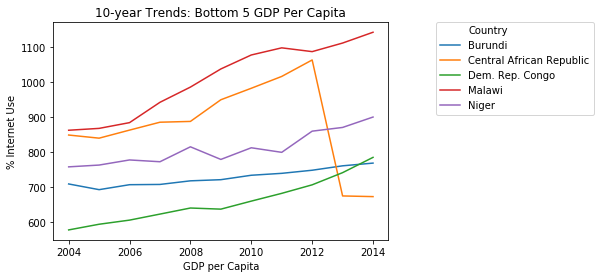

In [160]:
# sort chart
ten_year_lowest_gdp.sort_values('GDP_Per_Capita')

# plot the stats on one chart so easier to read
lowest_gdp_over_10years = sns.lineplot(x='Year', y='GDP_Per_Capita', hue='Country', data=ten_year_lowest_gdp,
                                 )
lowest_gdp_over_10years

# Add labels 
plt.xlabel('GDP per Capita')
plt.ylabel('% Internet Use')
plt.title('10-year Trends: Bottom 5 GDP Per Capita')
plt.legend(bbox_to_anchor=(1,0.9),
           bbox_transform=plt.gcf().transFigure)

<b>Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?</b>

# Bonus
Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
